In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/home/wahba/Documents/nids5/test/dataset/3_Full/attack_and_benign.csv')

selected_features = [
    "Bwd Packet Length Std",
    "Bwd Packet Length Mean",
    "Bwd Packet Length Max",
    "Total Length of Fwd Packets",
    "Fwd Packet Length Max",
    "Fwd Packet Length Mean",
    "Fwd IAT Std",
    "Total Fwd Packets",
    "Fwd Packet Length Std",
    "Flow IAT Max",
    "Flow Bytes/s",
    "Flow IAT Std",
    "Bwd Packet Length Min",
    "Fwd IAT Total",
    "Label",
]

# Keep only the selected features
df = df[selected_features]


/home/wahba/miniconda3/envs/ml1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


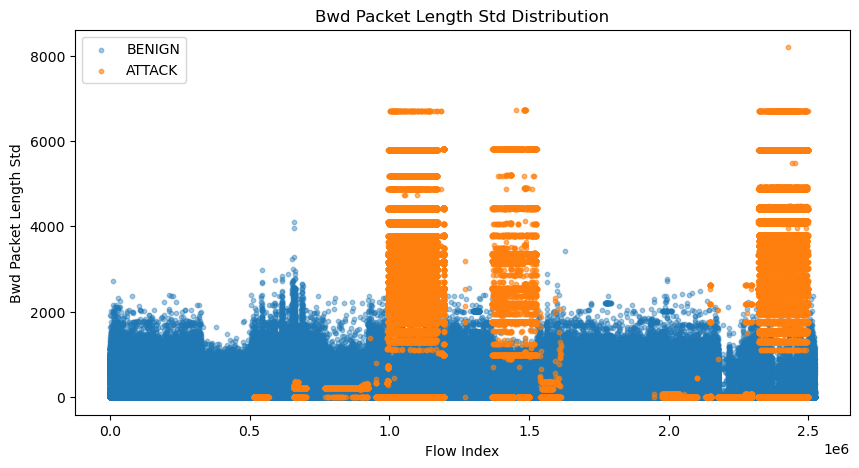

In [10]:
benign = df[df['Label'] == 'BENIGN']
attack = df[df['Label'] == 'Attack']

benign_sampled = benign.sample(frac=0.1, random_state=42)

plt.figure(figsize=(10, 5))
plt.scatter(
    benign.index,
    benign['Bwd Packet Length Std'],
    label='BENIGN',
    alpha=0.4,
    s=10,
)
plt.scatter(
    attack.index,
    attack['Bwd Packet Length Std'],
    label='ATTACK',
    alpha=0.6,
    s=10,
)

plt.title('Bwd Packet Length Std Distribution')
plt.xlabel('Flow Index')
plt.ylabel('Bwd Packet Length Std')
plt.legend()
plt.show()

/tmp/ipykernel_3601/1232332387.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['BENIGN', 'ATTACK'], showfliers=False)


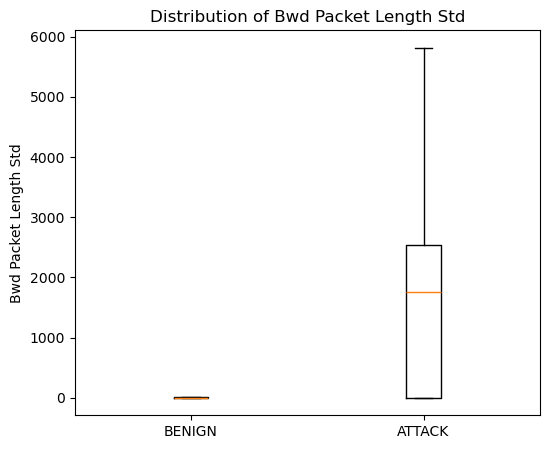

In [12]:
data = [
    benign_sampled['Bwd Packet Length Std'],
    attack['Bwd Packet Length Std']
]

plt.figure(figsize=(6, 5))
plt.boxplot(data, labels=['BENIGN', 'ATTACK'], showfliers=False)
plt.ylabel('Bwd Packet Length Std')
plt.title('Distribution of Bwd Packet Length Std')
plt.show()


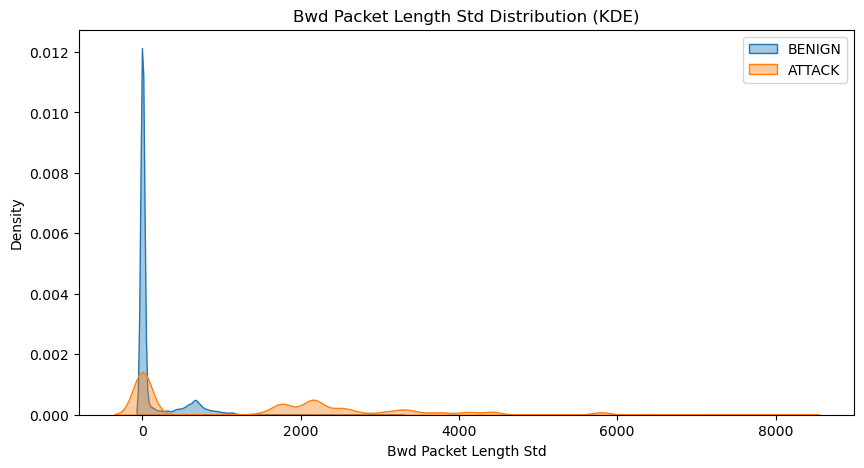

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))

# KDE for BENIGN
sns.kdeplot(
    benign_sampled['Bwd Packet Length Std'], 
    label='BENIGN', 
    fill=True,      # fill under the curve
    alpha=0.4
)

# KDE for ATTACK
sns.kdeplot(
    attack['Bwd Packet Length Std'], 
    label='ATTACK', 
    fill=True,
    alpha=0.4
)

plt.title('Bwd Packet Length Std Distribution (KDE)')
plt.xlabel('Bwd Packet Length Std')
plt.ylabel('Density')
plt.legend()
plt.show()


/tmp/ipykernel_3601/1995841596.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot,


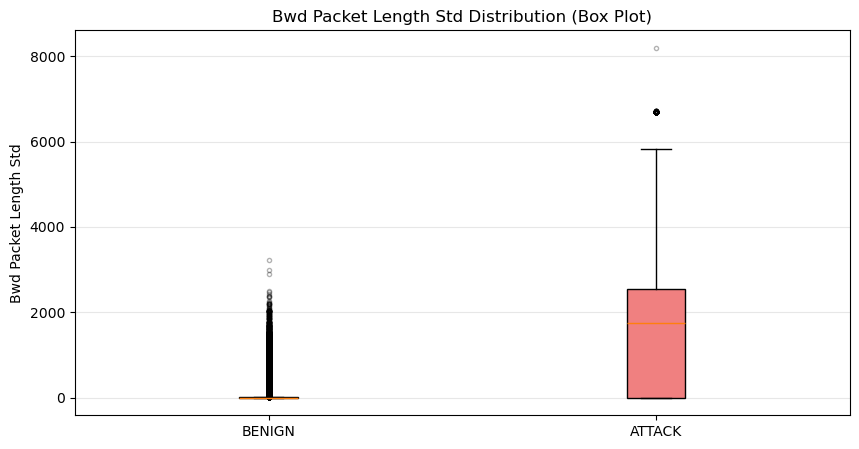

In [15]:
plt.figure(figsize=(10, 5))
data_to_plot = [benign_sampled['Bwd Packet Length Std'].dropna(), 
                attack['Bwd Packet Length Std'].dropna()]
bp = plt.boxplot(data_to_plot, 
                 labels=['BENIGN', 'ATTACK'],
                 patch_artist=True,
                 showfliers=True,  # show outliers
                 flierprops=dict(marker='o', markersize=3, alpha=0.3))
# Color the boxes
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
plt.title('Bwd Packet Length Std Distribution (Box Plot)')
plt.ylabel('Bwd Packet Length Std')
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipykernel_3601/3749209477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df,


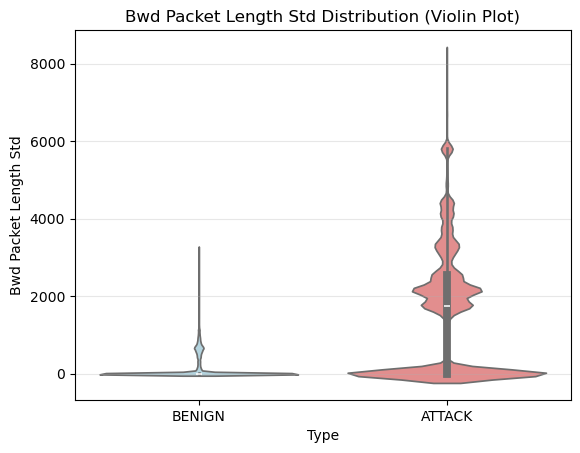

In [ ]:
benign_df = pd.DataFrame({
    'Bwd Packet Length Std': benign_sampled['Bwd Packet Length Std'],
    'Type': 'BENIGN'
})
attack_df = pd.DataFrame({
    'Bwd Packet Length Std': attack['Bwd Packet Length Std'],
    'Type': 'ATTACK'
})
combined_df = pd.concat([benign_df, attack_df], ignore_index=True)

sns.violinplot(data=combined_df, 
               x='Type', 
               y='Bwd Packet Length Std',
               palette=['lightblue', 'lightcoral'])
plt.title('Bwd Packet Length Std Distribution (Violin Plot)')
plt.ylabel('Bwd Packet Length Std')
plt.grid(axis='y', alpha=0.3)
plt.show()

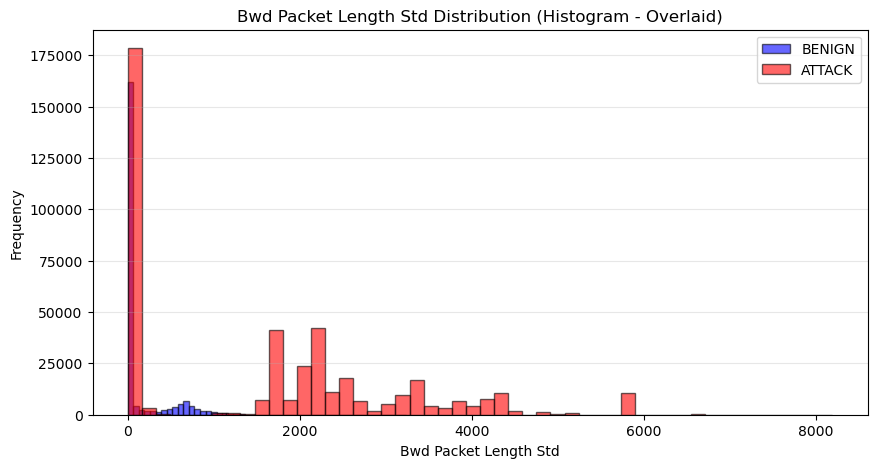

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(benign_sampled['Bwd Packet Length Std'].dropna(), 
         bins=50, 
         label='BENIGN', 
         alpha=0.6, 
         color='blue',
         edgecolor='black')
plt.hist(attack['Bwd Packet Length Std'].dropna(), 
         bins=50, 
         label='ATTACK', 
         alpha=0.6, 
         color='red',
         edgecolor='black')
plt.title('Bwd Packet Length Std Distribution (Histogram - Overlaid)')
plt.xlabel('Bwd Packet Length Std')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

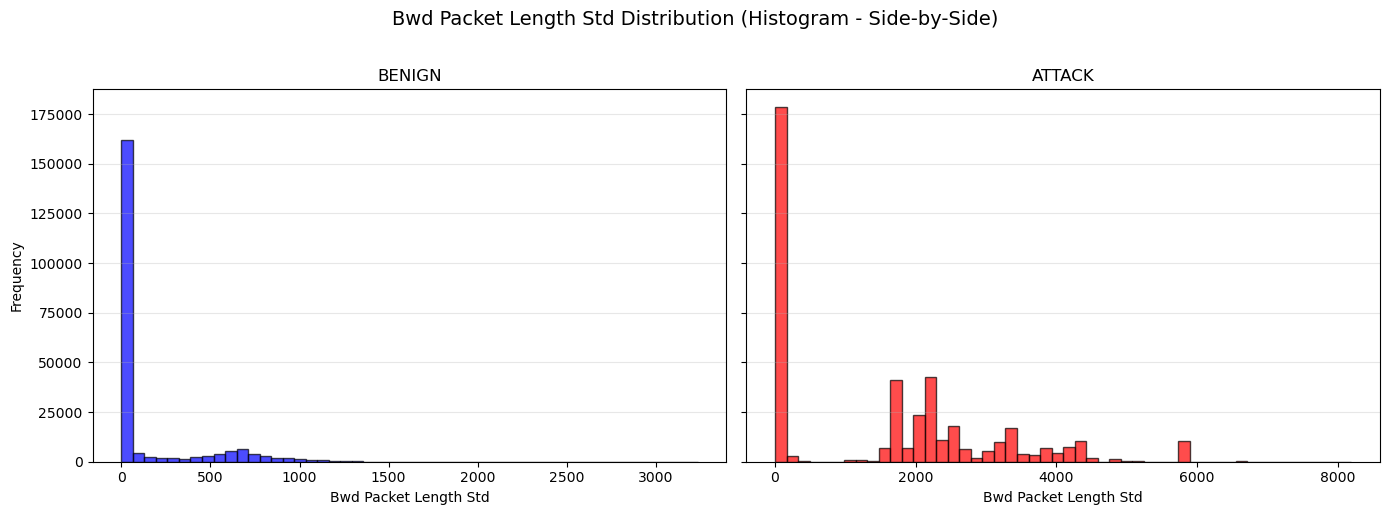

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].hist(benign_sampled['Bwd Packet Length Std'].dropna(), 
             bins=50, 
             color='blue', 
             alpha=0.7,
             edgecolor='black')
axes[0].set_title('BENIGN')
axes[0].set_xlabel('Bwd Packet Length Std')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(attack['Bwd Packet Length Std'].dropna(), 
             bins=50, 
             color='red', 
             alpha=0.7,
             edgecolor='black')
axes[1].set_title('ATTACK')
axes[1].set_xlabel('Bwd Packet Length Std')
axes[1].grid(axis='y', alpha=0.3)

fig.suptitle('Bwd Packet Length Std Distribution (Histogram - Side-by-Side)', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3601/1018214663.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot(data_to_plot,


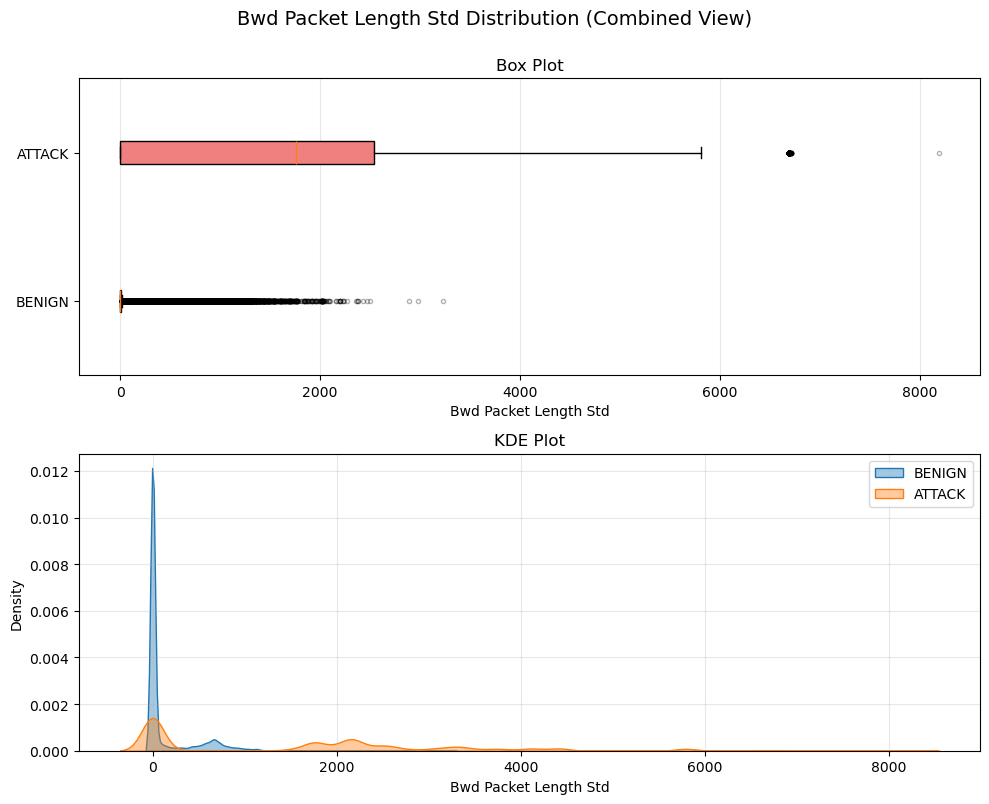

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Top: Box plot
data_to_plot = [benign_sampled['Bwd Packet Length Std'].dropna(), 
                attack['Bwd Packet Length Std'].dropna()]
bp = axes[0].boxplot(data_to_plot, 
                     labels=['BENIGN', 'ATTACK'],
                     patch_artist=True,
                     showfliers=True,
                     flierprops=dict(marker='o', markersize=3, alpha=0.3),
                     vert=False)  # horizontal
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Bwd Packet Length Std')
axes[0].grid(axis='x', alpha=0.3)

# Bottom: KDE
sns.kdeplot(benign_sampled['Bwd Packet Length Std'], 
            label='BENIGN', 
            fill=True, 
            alpha=0.4,
            ax=axes[1])
sns.kdeplot(attack['Bwd Packet Length Std'], 
            label='ATTACK', 
            fill=True,
            alpha=0.4,
            ax=axes[1])
axes[1].set_title('KDE Plot')
axes[1].set_xlabel('Bwd Packet Length Std')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(alpha=0.3)

fig.suptitle('Bwd Packet Length Std Distribution (Combined View)', 
             fontsize=14, y=1.00)
plt.tight_layout()
plt.show()


In [20]:
print("\n=== Statistical Summary ===")
print("\nBENIGN Statistics:")
print(benign_sampled['Bwd Packet Length Std'].describe())
print("\nATTACK Statistics:")
print(attack['Bwd Packet Length Std'].describe())

# Optional: Mann-Whitney U test for statistical significance
from scipy import stats
statistic, p_value = stats.mannwhitneyu(
    benign_sampled['Bwd Packet Length Std'].dropna(),
    attack['Bwd Packet Length Std'].dropna(),
    alternative='two-sided'
)
print(f"\nMann-Whitney U test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The distributions are significantly different (p < 0.05)")
else:
    print("No significant difference found (p >= 0.05)")


=== Statistical Summary ===

BENIGN Statistics:
count    209613.000000
mean        132.849515
std         283.163674
min           0.000000
25%           0.000000
50%           0.000000
75%           7.071068
max        3233.738858
Name: Bwd Packet Length Std, dtype: float64

ATTACK Statistics:
count    425828.000000
mean       1571.745720
std        1574.374487
min           0.000000
25%           0.000000
50%        1757.579003
75%        2537.820147
max        8194.660487
Name: Bwd Packet Length Std, dtype: float64

Mann-Whitney U test:
Statistic: 23106493049.0
P-value: 0.0
The distributions are significantly different (p < 0.05)
